<a href="https://www.kaggle.com/code/imeldamaretta/modelml-yolov8-ipynb?scriptVersionId=248788741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
'''! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow'''

'! pip install ultralytics\n\n! pip install tensorflow\n\n! pip install keras\n\n! pip install roboflow'

# Importing Library

In [3]:
'''from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2'''

'from ultralytics import YOLO\n\nimport matplotlib.pyplot as plt\n\nimport tensorflow as tf\n\nimport cv2'

# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [5]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.3 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
RF_TOKEN = user_secrets.get_secret("RF_TOKEN")

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(9)
dataset = version.download("yolov8")

  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.3 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
ydata-profiling 4.12.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-9 in yolov8:: 100%|██████████| 7182/7182 [00:00<00:00, 8224.92it/s]


# Training the Model

In [8]:
!pip install --upgrade ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [9]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-gs5mncxk
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-gs5mncxk
  Resolved https://github.com/ultralytics/ultralytics.git to commit 72804697eb716a9d27e8ee8e70c09631b5adf396
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for ultralytics: filename=ultralytics-8.3.162-py3-none-any.whl size=1040194 sha256=2428297ce171f497eadc73cc950ea6b85be7faf8bef6a3cf77fc87db6307774b
  Stored in directory: /tmp/pip-ephem-wheel-cache-6lvt37gr/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


In [10]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(
    data='/kaggle/working/Flower-Disease-9/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    optimizer='SGD',
    lr0=0.01,         # Initial learning rate
    lrf=0.01,         # Final learning rate (lr0 * lrf)
    warmup_epochs=3,
    box=7.5,         # Box loss weight
    cls=0.5,          # Class loss weight
    dfl=1.5,          # Distribution focal loss weight
    patience=10,       # Early stopping patience
    save=True
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 121MB/s]


Ultralytics 8.3.162 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Flower-Disease-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 26.0MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 114MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1349.2±372.3 MB/s, size: 45.1 KB)


train: Scanning /kaggle/working/Flower-Disease-9/train/labels... 2978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2978/2978 [00:02<00:00, 1127.07it/s]


train: New cache created: /kaggle/working/Flower-Disease-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 13435. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 750.7±493.8 MB/s, size: 44.1 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<00:00, 574.18it/s]

val: New cache created: /kaggle/working/Flower-Disease-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
WARNING ⚠️ 'list' object cannot be interpreted as an integer
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.06G      1.187      3.701       1.48         50        640:   0%|          | 1/373 [00:00<06:00,  1.03it/s]Exception in thread Thread-21 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py", line 842, in plot_images
    annotator.im.save(fname)  # save
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2605, in save
    self.encoderinfo = {**im._default_encoderinfo, **encoderinfo}
  File "/opt/conda/lib/python3.10/site-packages/PIL/JpegImagePlugin.py", line 850, in _save
    ImageFile._save(
  File "/opt/conda/lib/python3.10/site-packages/PIL/Ima

                   all        317        958      0.324      0.456       0.24      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.34G      1.307      2.172      1.433          9        640: 100%|██████████| 373/373 [00:43<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.88it/s]


                   all        317        958      0.365      0.386      0.334      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.34G      1.295      1.897      1.424         27        640: 100%|██████████| 373/373 [00:42<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.05it/s]


                   all        317        958      0.413      0.351      0.249      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.34G      1.335      1.827      1.451         14        640: 100%|██████████| 373/373 [00:42<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        317        958      0.577      0.302      0.401      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.34G      1.309      1.686      1.424         17        640: 100%|██████████| 373/373 [00:42<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.95it/s]


                   all        317        958      0.352      0.282       0.32      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.34G      1.274      1.603       1.41         10        640: 100%|██████████| 373/373 [00:42<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.99it/s]


                   all        317        958      0.417      0.392      0.394      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.34G      1.264      1.497      1.396         13        640: 100%|██████████| 373/373 [00:42<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.24it/s]


                   all        317        958      0.502      0.417      0.402      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.34G      1.241      1.464      1.394         14        640: 100%|██████████| 373/373 [00:42<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]


                   all        317        958       0.38      0.454      0.433      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.34G      1.233      1.413      1.387         11        640: 100%|██████████| 373/373 [00:42<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 11.01it/s]

                   all        317        958       0.42      0.419      0.432      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.34G      1.222      1.366      1.379         12        640: 100%|██████████| 373/373 [00:42<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.38it/s]


                   all        317        958      0.367      0.457      0.438      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.34G      1.209      1.319      1.369         21        640: 100%|██████████| 373/373 [00:42<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.58it/s]


                   all        317        958        0.6      0.353      0.455      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.34G      1.206      1.284      1.366         14        640: 100%|██████████| 373/373 [00:42<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.05it/s]


                   all        317        958      0.347      0.483      0.376      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.34G      1.181      1.233      1.342         10        640: 100%|██████████| 373/373 [00:42<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.26it/s]


                   all        317        958      0.608      0.414      0.452      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.34G      1.181      1.214      1.349         17        640: 100%|██████████| 373/373 [00:42<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.06it/s]

                   all        317        958      0.327      0.436        0.4      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.34G      1.168      1.211      1.345          2        640: 100%|██████████| 373/373 [00:42<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.99it/s]

                   all        317        958      0.378      0.368      0.357      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.34G      1.153      1.164      1.336         13        640: 100%|██████████| 373/373 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.08it/s]

                   all        317        958      0.358      0.453      0.432        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.34G      1.153      1.128      1.327         25        640: 100%|██████████| 373/373 [00:42<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.03it/s]

                   all        317        958      0.504      0.404       0.46      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.34G      1.144      1.118       1.33         14        640: 100%|██████████| 373/373 [00:42<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.78it/s]

                   all        317        958      0.599      0.385      0.456      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.34G      1.126       1.09      1.319         13        640: 100%|██████████| 373/373 [00:42<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00, 10.00it/s]

                   all        317        958      0.451      0.439      0.476      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.34G      1.121      1.092      1.316         24        640: 100%|██████████| 373/373 [00:42<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.56it/s]

                   all        317        958      0.438      0.423      0.453      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.34G      1.116      1.052       1.31         13        640: 100%|██████████| 373/373 [00:42<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.22it/s]

                   all        317        958      0.531      0.369      0.359      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.34G      1.114      1.061       1.31         15        640: 100%|██████████| 373/373 [00:42<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.32it/s]

                   all        317        958      0.402      0.371      0.414      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.34G      1.108      1.026      1.303         36        640: 100%|██████████| 373/373 [00:42<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.10it/s]

                   all        317        958      0.626      0.406      0.462      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.34G      1.095       1.01      1.294          6        640: 100%|██████████| 373/373 [00:42<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.12it/s]

                   all        317        958      0.423        0.4       0.41      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.34G       1.09     0.9986      1.286         11        640: 100%|██████████| 373/373 [00:42<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.16it/s]

                   all        317        958      0.606      0.401      0.424      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.34G      1.078     0.9774      1.281         15        640: 100%|██████████| 373/373 [00:43<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.06it/s]

                   all        317        958      0.397      0.355      0.394      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.34G      1.067     0.9618      1.281          8        640: 100%|██████████| 373/373 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.84it/s]

                   all        317        958       0.48      0.401      0.468      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.34G      1.066     0.9579      1.279         25        640: 100%|██████████| 373/373 [00:42<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        317        958       0.62      0.354      0.439      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.34G      1.065     0.9501      1.279         20        640: 100%|██████████| 373/373 [00:42<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.88it/s]

                   all        317        958      0.566      0.399      0.425      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.34G      1.052     0.9277      1.267         13        640: 100%|██████████| 373/373 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.09it/s]

                   all        317        958      0.542      0.409      0.399      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.34G      1.061       0.94      1.278         24        640: 100%|██████████| 373/373 [00:42<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.21it/s]

                   all        317        958      0.542      0.423      0.481      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.34G      1.045     0.9034      1.264         13        640: 100%|██████████| 373/373 [00:42<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]


                   all        317        958      0.406      0.455      0.429      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.34G      1.046     0.8947      1.262         19        640: 100%|██████████| 373/373 [00:42<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        317        958      0.428      0.434      0.464      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.34G       1.04     0.8824      1.255         22        640: 100%|██████████| 373/373 [00:42<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.91it/s]


                   all        317        958      0.361      0.437      0.387      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.34G      1.028     0.8677      1.248         18        640: 100%|██████████| 373/373 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.45it/s]

                   all        317        958      0.633      0.359      0.463      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.34G      1.025     0.8546      1.248         12        640: 100%|██████████| 373/373 [00:42<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.06it/s]

                   all        317        958      0.534      0.347      0.459      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.34G      1.024     0.8551      1.248         24        640: 100%|██████████| 373/373 [00:42<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.09it/s]

                   all        317        958      0.454      0.412      0.458      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.34G      1.014      0.841      1.243         27        640: 100%|██████████| 373/373 [00:43<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.04it/s]

                   all        317        958      0.494      0.429      0.455       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.34G      1.008     0.8309      1.245         22        640: 100%|██████████| 373/373 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.11it/s]

                   all        317        958      0.454      0.421      0.437      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.34G     0.9954     0.8216      1.234          6        640: 100%|██████████| 373/373 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.76it/s]

                   all        317        958      0.468      0.371      0.437      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.34G     0.9995     0.8266      1.239          5        640: 100%|██████████| 373/373 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        317        958      0.513      0.378       0.45      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.34G     0.9957     0.8206      1.228         18        640: 100%|██████████| 373/373 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.60it/s]

                   all        317        958      0.531      0.388      0.455      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.34G     0.9856     0.7971      1.223         17        640: 100%|██████████| 373/373 [00:43<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]


                   all        317        958      0.503      0.422      0.465      0.315
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 33, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

43 epochs completed in 0.539 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:00<00:02,  7.04it/s]Exception in thread Thread-25 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-26 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py", line 842, in plot_images
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threa

                   all        317        958      0.453      0.425      0.464      0.334
            black-spot         71        172      0.958      0.799      0.902      0.698
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.744          1      0.972      0.654
        fungal-disease        100        100      0.196       0.02     0.0478     0.0178
               healthy        201        562      0.819      0.731      0.835      0.621
                orchid          3         14          0          0     0.0268      0.015
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6c1dba19f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Evaluating the Model

In [12]:
# Evaluate the model
metrics = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")

# Visualize the results using the plot method
results = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml',plots=True)

Ultralytics 8.3.162 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1389.2±350.1 MB/s, size: 42.7 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▎         | 1/40 [00:00<00:08,  4.54it/s]Exception in thread Thread-32 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py", line 842, in plot_images
Exception in thread Thread-33 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/

                   all        317        958      0.429      0.434      0.464      0.334
            black-spot         71        172      0.933       0.82      0.902      0.699
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.719          1      0.972      0.654
        fungal-disease        100        100      0.114       0.02     0.0476     0.0177
               healthy        201        562      0.796      0.747      0.835      0.621
                orchid          3         14     0.0112     0.0183     0.0269      0.015
Speed: 0.5ms preprocess, 2.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6d8916fd30>
curves: ['Precision-Rec

val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 2/40 [00:00<00:09,  4.03it/s]Exception in thread Thread-39 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/utils/plotting.py", line 842, in plot_images
    annotator.im.save(fname)  # save
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2605, in save
    self.encoderinfo = {**im._default_encoderinfo, **encoderinfo}
  File "/

                   all        317        958      0.429      0.434      0.464      0.334
            black-spot         71        172      0.933       0.82      0.902      0.699
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.719          1      0.972      0.654
        fungal-disease        100        100      0.114       0.02     0.0476     0.0177
               healthy        201        562      0.796      0.747      0.835      0.621
                orchid          3         14     0.0112     0.0183     0.0269      0.015
Speed: 0.6ms preprocess, 3.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3


# Testing the Model

In [13]:
!wget 'https://worldofplants.ai/wp-content/uploads/2024/05/a-close-up-of-a-leaf-description-automatically-ge-3.jpeg' -O 'indoor.jpg'

--2025-07-04 10:29:24--  https://worldofplants.ai/wp-content/uploads/2024/05/a-close-up-of-a-leaf-description-automatically-ge-3.jpeg
Resolving worldofplants.ai (worldofplants.ai)... 92.112.198.31, 148.135.128.130, 2a02:4780:51:ed:ccac:b133:a78e:ef87, ...
Connecting to worldofplants.ai (worldofplants.ai)|92.112.198.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28750 (28K) [image/jpeg]
Saving to: 'indoor.jpg'

indoor.jpg          100%[===================>]  28.08K  --.-KB/s    in 0.05s   

2025-07-04 10:29:25 (616 KB/s) - 'indoor.jpg' saved [28750/28750]




image 1/1 /kaggle/working/indoor.jpg: 512x640 1 downy-mildew, 4 healthys, 36.8ms
Speed: 3.0ms preprocess, 36.8ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 4., 2., 4., 4.], device='cuda:0')
conf: tensor([0.7860, 0.6844, 0.4427, 0.3095, 0.2780], device='cuda:0')
data: tensor([[9.1590e-01, 0.0000e+00, 1.7233e+02, 1.4841e+02, 7.8599e-01, 4.0000e+00],
        [0.0000e+00, 1.7471e+02, 6.8139e+01, 4.6026e+02, 6.8442e-01, 4.0000e+00],
        [8.9844e+01, 1.0750e+02, 5.5309e+02, 4.1084e+02, 4.4268e-01, 2.0000e+00],
        [2.4922e+02, 1.0490e-01, 4.4891e+02, 1.3051e+02, 3.0947e-01, 4.0000e+00],
        [8.9633e+01, 1.1052e+02, 5.1021e+02, 4.0928e+02, 2.7799e-01, 4.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (465, 614)
shape: torch.Size([5, 6])
xywh: tensor([[ 86.6213,  74.2031, 171.4108, 148.4063],
        [ 34.0696, 317.4873,  68.1392, 

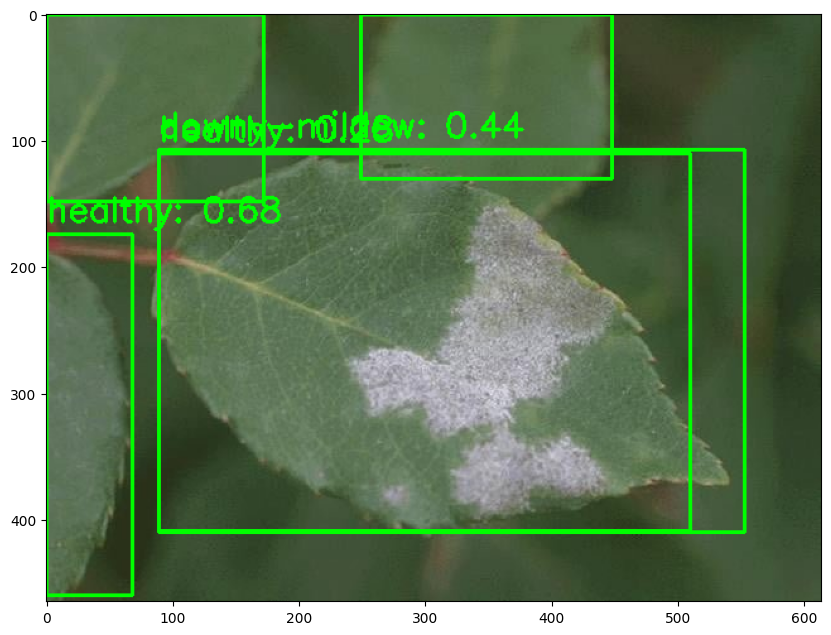

In [14]:
import cv2
import matplotlib.pyplot as plt


# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/kaggle/working/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/kaggle/working/indoor.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment

In [15]:
#from google.colab import files

# Using h5 format

In [16]:
#model.save('florys.h5')

# Using saved_model format

In [17]:
#odel.export(format='saved_model')

In [18]:
#!zip -r saved_model.zip /kaggle/working/runs/detect/train/weights/best_saved_model

In [19]:
'''from IPython.display import FileLink
FileLink(r'saved_model.zip')'''

"from IPython.display import FileLink\nFileLink(r'saved_model.zip')"

# Using the TF.js format

In [20]:
#model.export(format = 'tfjs')

In [21]:
#!zip -r tfjs.zip /kaggle/working/runs/detect/train/weights/best_web_model

In [22]:
'''from IPython.display import FileLink
FileLink(r'tfjs.zip')'''

"from IPython.display import FileLink\nFileLink(r'tfjs.zip')"

## Using the TFLite format

In [23]:
#model.save('florys.tflite')

In [24]:
#model.export(format='tflite')

In [25]:
#FileLink(r'runs/detect/train/weights/best_saved_model/best_float32.tflite')

In [26]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [27]:
#model.save('florys.pt')

In [28]:
#files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [29]:
#model.save('florys.onnx')

In [30]:
#model.export(format='onnx')

In [31]:
#FileLink(r'runs/detect/train/weights/best.onnx')

In [32]:
#files.download('/content/runs/detect/train2/weights/best.onnx')